In [135]:
import cv2
import random
import numpy as np
from PIL import Image

from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

from IPython.display import display

In [136]:
imagesDirectory = '../data/images/'

In [137]:
images = [f for f in listdir(imagesDirectory) if isfile(join(imagesDirectory, f)) and f.endswith('.jpg')]

In [138]:
random.sample(images,4)

['zbz-990101176160205508.jpg',
 'zbz-990103962910205508.jpg',
 'zbz-990109266890205508.jpg',
 'nb-812997.jpg']

In [139]:
exampleIDs = ['nb-480015']#

In [140]:
exampleImages = [d for d in images if d[:-4] in exampleIDs]

In [141]:
exampleImage = random.sample(images,1)[0]# exampleImages[0]

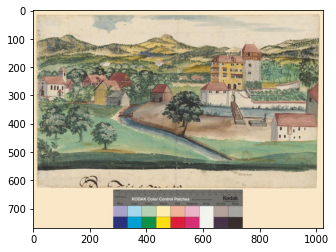

In [142]:
image = cv2.imread(join(imagesDirectory, exampleImage))
image = image[:,:,::-1]
plt.imshow(Image.fromarray(image))

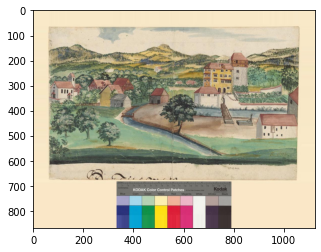

In [143]:
extendedImage = cv2.copyMakeBorder(image,50,50,50,50,cv2.BORDER_REPLICATE)
plt.imshow(Image.fromarray(extendedImage))

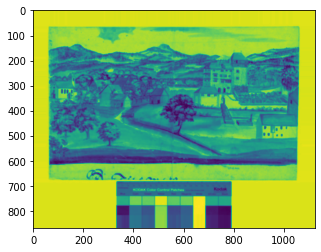

In [144]:
gray = cv2.cvtColor(extendedImage.copy(), cv2.COLOR_RGB2GRAY)
gray = cv2.blur(gray, (5, 5))
plt.imshow(Image.fromarray(gray))

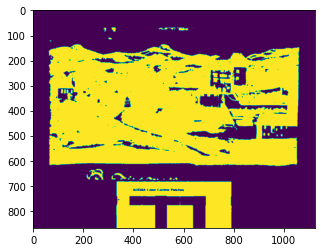

In [145]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(Image.fromarray(thresh))

In [146]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


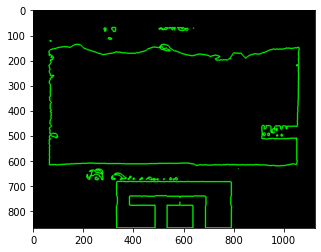

In [147]:
img_contours = np.zeros(extendedImage.shape)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
plt.imshow(img_contours)

In [148]:
areas = [cv2.contourArea(c) for c in contours]

In [149]:
max_index = np.argmax(areas)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


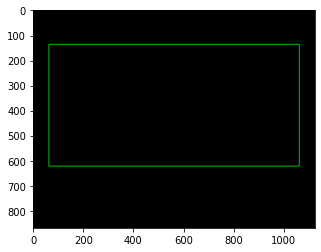

In [150]:
cnt=contours[max_index]
x,y,w,h = cv2.boundingRect(cnt)
img = np.zeros(extendedImage.shape)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)